# Dự đoán giá nhà

1. Định nghĩa vấn đề
  - Mục tiêu: dự đoán giá bán của từng ngôi nhà
2. Lựa chọn tính năng:
  - Chọn các tính năng đặc trung để tạo mô hình Machine Learning
  - Cần sử dụng các kỹ thuật chọn lọc đặc trưng để xác định tính năng cần thiết
3. Chia nhỏ tập các dữ liệu

  3.1. Dataset -> X,Y
    - "Data": Tập dữ liệu
    - "X": Tập dữ liệu các tính năng
    - "Y": Tập dữ liệu biên mục tiêu

  3.2. X,Y-> X_train,Y_train, X_valid, Y_valid

4. Đào tạo mô hình Machine Learning

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
data=pd.read_csv("/content/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


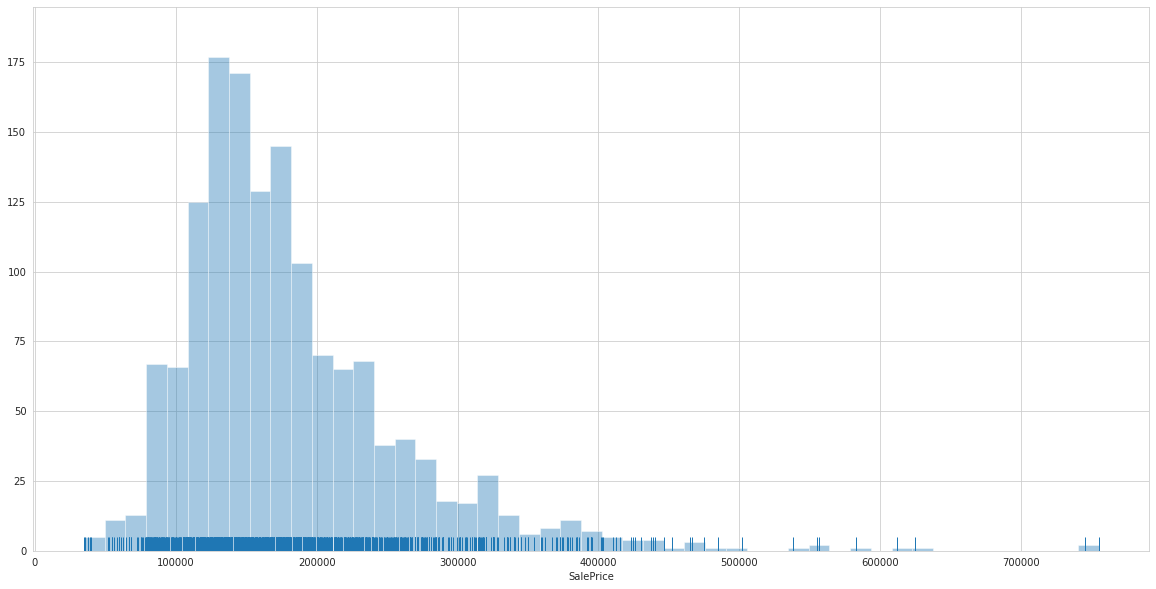

In [187]:
sns.set_style("whitegrid")
sns.distplot(data['SalePrice'], kde = False, rug = "True")

Ta thấy giá các ngôi nhà đã bán thường tập trung ở mức giá 100.000 đến 300.000 , và nhiều nhất là 110.000 đến 250.000

In [188]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Lựa chọn tính năng

In [189]:
features = ["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","GarageArea"]


Chia nhỏ các tập dữ liệu

In [190]:
X=data[features]
Y=data["SalePrice"]

In [191]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,GarageArea
0,8450,2003,856,854,2,3,548
1,9600,1976,1262,0,2,3,460
2,11250,2001,920,866,2,3,608
3,9550,1915,961,756,1,3,642
4,14260,2000,1145,1053,2,4,836


In [192]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Clean Data

In [193]:
df = pd.DataFrame(data)
print('DataFrame có missing value')
print(df)

# Fill về trước
fw = df.fillna(method='ffill')
print('Fill về trước')
print(fw)
# Fill về sau
bw = df.fillna(method='bfill', limit=1)
print('Fill về sau với limit = 1')
print(bw)

DataFrame có missing value
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utiliti

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)


In [195]:
df1 = pd.read_csv("/content/train.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [196]:
df1.shape

(1460, 81)

In [197]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [198]:
df1['Id'].unique()

array([   1,    2,    3, ..., 1458, 1459, 1460])

In [221]:
df1['LotArea'].value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

Drop những feature cho rằng không dùng cho việc xây dựng hệ thống

In [200]:
df2=df1.drop(['PoolQC','Alley'],axis='columns')
df2.shape

(1460, 79)

Xử lý các giá trị NA

In [201]:
df2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 79, dtype: int64

In [202]:
df2.shape

(1460, 79)

In [203]:
df3=df2.dropna()
df3.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [204]:
df3.shape

(9, 79)

In [205]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [207]:
df3[~df3['LotArea'].apply(is_float)].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Giảm Chiều Dữ liệu

 X,Y-> X_train,Y_train, X_valid, Y_valid


In [209]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=0)

In [210]:
X_train.shape

(1168, 7)

In [211]:
X.shape

(1460, 7)

In [212]:
data.shape

(1460, 81)

In [213]:
X_valid.shape

(292, 7)

Đào tạo mô hình Machine Learning

In [214]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)

In [215]:
#Điều chỉnh dữ liệu vào mô hình
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1)

In [216]:
Y_preds = dt_model.predict(X_valid.head())
Y_preds

array([257500., 140000.,  98300., 200000.,  87450.])

In [217]:
pd.DataFrame({'Y': Y_valid.head(), 'Y_preds': Y_preds})

,Y,Y_preds
529,200624,257500.0
491,133000,140000.0
459,110000,98300.0
279,192000,200000.0
655,88000,87450.0


In [218]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [219]:
rf_val_preds = rf_model.predict(X_valid)

In [220]:
rf_val_preds[:5]

array([262214.        , 141770.        , 115984.31      , 190889.        ,
        89100.13333333])

# Mục mới